# Joseph Williams, Joshua Chen Programming Assignment

In [219]:
import numpy as np
import pandas as pd
import time as t

! python3 --version
! jupyter lab --version

Python 3.12.4
4.0.11


# Matrix Multiplcation Problem

### Define Matrices from input.txt

In [2]:
with open("input.txt") as input_file:  
    # read from a file named “input.txt” 
    data = input_file.read() 
    split_file = data.split(";")
    matrix_values_a, matrix_values_b = split_file[0].split(","), split_file[1].split(",")

    # Create two 4 × 4 matrices containing the 16 integers from each sequence
    matrix_a = np.array(matrix_values_a, dtype=float).reshape(4,4)
    matrix_b = np.array(matrix_values_b, dtype=float).reshape(4,4)

    # Show Matrices
    print(f'Matrix A:\n {matrix_a}')
    print(f'Matrix B:\n {matrix_b}')
    print("\n")

Matrix A:
 [[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]
Matrix B:
 [[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]




### Extract dimensions p, q, r

In [3]:
p, q, r = matrix_a.shape[0], matrix_a.shape[1], matrix_b.shape[1]

print(f'P: {p}\nQ: {q}\nR: {r}')

P: 4
Q: 4
R: 4


## Define Algorithms 1-5

### Algorithm 1 - inputs are A is p x q, B is q x r, and C is p x r matrix and output is a product matrix C

In [4]:
def algorithm_1(A, B, C, p, q, r):
    # Algorithm as defined in assigment instructions
    for i in range(p):
        for j in range(r):
            sum = 0
            for k in range(q):
                sum += A[i][k] * B[k][j]
            C[i][j] = sum
    return C

### Algorithm 2 - inputs are A is p x q, B is q x r, and C is p x r matrix, T is step size and block muiltplies to output a product matrix C

In [5]:
def algorithm_2(A, B, C, p, q, r, T=5):
    # Algorithm as defined in assigment instructions
    for I in range(0, p, T):
        for J in range(0, r, T):
            for K in range(0, q, T):
                for i in range(I, min(I + T, p)):
                    for j in range(J, min(J + T, r)):
                        sum = 0
                        for k in range(K, min(K + T, q)):
                            sum += A[i][k] * B[k][j]
                        C[i][j] += sum
    return C

### Algorithm 3 - inputs are A is p x q, B is q x r, and C is p x r matrix, splits matrices into 2 and recursivaly solves for a product maxtrix C

In [6]:
def algorithm_3(A, B, C, p, q, r):
    # Determine the maximum dimension
    max_value = max(p, q, r)
    
    # Base case
    if p == 1 or q == 1 or r == 1:
        return algorithm_1(A, B, np.zeros((p, r)), p, q, r)

    # Determine the Split
    if max_value == p:
        div_p = p // 2
        
        # Split A horizontally
        a_1 = A[:div_p, :]
        a_2 = A[div_p:, :]

        # Recalculate p & q
        p_1, q_1 = a_1.shape
        p_2, q_2 = a_2.shape
        
        # Recursive calls
        c_1 = algorithm_3(a_1, B, np.zeros((p_1, r)), p_1, q_1, r)
        c_2 = algorithm_3(a_2, B, np.zeros((p_2, r)), p_2, q_2, r)

        # Combine results vertically
        C = np.vstack((c_1, c_2))
    
    elif max_value == r:
        div_r = r // 2
        
        # Split B vertically
        b_1 = B[:, :div_r]
        b_2 = B[:, div_r:]

        # Recalculate r
        r_1 = b_1.shape[1]
        r_2 = b_2.shape[1]
        
        # Recursive calls
        c_1 = algorithm_3(A, b_1, np.zeros((p, r_1)), p, q, r_1)
        c_2 = algorithm_3(A, b_2, np.zeros((p, r_2)), p, q, r_2)

        # Combine results horizontally
        C = np.hstack((c_1, c_2))
    
    else:
        div_p = p // 2
        div_r = r // 2
        
        # Split A horizontally 
        a_1 = A[:div_p, :]
        a_2 = A[div_p:, :]
        
        # Split B vertically
        b_1 = B[:, :div_r]
        b_2 = B[:, div_r:]

        # Recalculate p, q, & r
        p_1, q_1 = a_1.shape
        p_2, q_2 = a_2.shape
        r_1 = b_1.shape[1]
        r_2 = b_2.shape[1]

        # Recursive calls
        c_11 = algorithm_3(a_1, b_1, np.zeros((p_1, r_1)), p_1, q_1, r_1)
        c_12 = algorithm_3(a_1, b_2, np.zeros((p_1, r_1)), p_1, q_1, r_2)
        c_21 = algorithm_3(a_2, b_1, np.zeros((p_2, r_1)), p_2, q_2, r_1)
        c_22 = algorithm_3(a_2, b_2, np.zeros((p_2, r_2)), p_2, q_2, r_2)

        # Combine results
        top = np.hstack((c_11, c_12))
        bottom = np.hstack((c_21, c_22))
        
        C = np.vstack((top, bottom))

    return C

### Algorithm 4 - Strassens algorithm where inputs are A is 2n x 2n , B is 2n x 2n , and C is 2n x 2n matrix using recursive splitting and addition on block matrices whose dimensions are powers of 2 until the base case and outputs the product matrix C

In [7]:
def algorithm_4(A, B, C):
    n = A.shape[0]
    div = n // 2
    
    if n <= 1:
        C += A * B
        
    else: 
        a_1_1 = A[:div, :div]
        a_1_2 = A[:div, div:n]
        a_2_1 = A[div:n, :div]
        a_2_2 = A[div:n, div:]
        
        b_1_1 = B[:div, :div]
        b_1_2 = B[:div, div:n]
        b_2_1 = B[div:n, :div]
        b_2_2 = B[div:n, div:]

        c_1_1 = np.zeros((div, div))
        c_1_2 = np.zeros((div, div))
        c_2_1 = np.zeros((div, div))
        c_2_2 = np.zeros((div, div))
        
        S_1 = b_1_2 - b_2_2
        S_2 = a_1_1 + a_1_2
        S_3 = a_2_1 + a_2_2
        S_4 = b_2_1 - b_1_1
        S_5 = a_1_1 + a_2_2
        S_6 = b_1_1 + b_2_2
        S_7 = a_1_2 - a_2_2
        S_8 = b_2_1 + b_2_2
        S_9 = a_1_1 - a_2_1
        S_10 = b_1_1 + b_1_2

        P_1 = algorithm_4(a_1_1, S_1, np.zeros((div,div)))
        P_2 = algorithm_4(S_2, b_2_2, np.zeros((div, div)))
        P_3 = algorithm_4(S_3, b_1_1, np.zeros((div, div)))
        P_4 = algorithm_4(a_2_2, S_4, np.zeros((div, div)))
        P_5 = algorithm_4(S_5, S_6, np.zeros((div, div)))
        P_6 = algorithm_4(S_7, S_8, np.zeros((div, div)))
        P_7 = algorithm_4(S_9, S_10, np.zeros((div, div)))

        c_1_1 += P_5 + P_4 - P_2 + P_6
        c_1_2 += P_1 + P_2
        c_2_1 += P_3 + P_4
        c_2_2 += P_5 + P_1 - P_3 - P_7

        C += np.vstack((np.hstack((c_1_1, c_1_2)), np.hstack((c_2_1, c_2_2))))
        
    return C

### Algorithm 5 - variation of Strassens algorithm where inputs are A is 2n x 2n , B is 2n x 2n , and C is 2n x 2n matrix using recursive splitting and then addition on block matrices whose dimensions are powers of 2  and then multiplies them at the base case to output a product matrix C

In [8]:
def algorithm_5(A, B, C):
    n = A.shape[0]
    div = n // 2
    
    if n < 3:
        p, q, r = A.shape[0], A.shape[1], B.shape[1]
        algorithm_1(A, B, C, p, q, r)
        
    else: 
        a_1_1 = A[:div, :div]
        a_1_2 = A[:div, div:n]
        a_2_1 = A[div:n, :div]
        a_2_2 = A[div:n, div:]
        
        b_1_1 = B[:div, :div]
        b_1_2 = B[:div, div:n]
        b_2_1 = B[div:n, :div]
        b_2_2 = B[div:n, div:]

        c_1_1 = np.zeros((div, div))
        c_1_2 = np.zeros((div, div))
        c_2_1 = np.zeros((div, div))
        c_2_2 = np.zeros((div, div))

        M_1 = algorithm_5(a_1_1 + a_2_2, b_1_1 + b_2_2, np.zeros((div,div)))
        M_2 = algorithm_5(a_2_1 + a_2_2, b_1_1, np.zeros((div,div)))
        M_3 = algorithm_5(a_1_1, b_1_2 - b_2_2, np.zeros((div,div)))
        M_4 = algorithm_5(a_2_2, b_2_1 - b_1_1, np.zeros((div,div)))
        M_5 = algorithm_5(a_1_1 + a_1_2, b_2_2, np.zeros((div,div)))
        M_6 = algorithm_5(a_2_1 - a_1_1, b_1_1 + b_1_2, np.zeros((div,div)))
        M_7 = algorithm_5(a_1_2 - a_2_2, b_2_1 + b_2_2, np.zeros((div,div)))

        c_1_1 += M_1 + M_4 - M_5 + M_7
        c_1_2 += M_3 + M_5
        c_2_1 += M_2 + M_4
        c_2_2 += M_1 - M_2 + M_3 + M_6

        C += np.vstack((np.hstack((c_1_1, c_1_2)), np.hstack((c_2_1, c_2_2))))
        
    return C

## Running Each Algorithm

In [9]:
# Algorithm 1
matrix_c = np.zeros((p,r))
alg_1_answer = algorithm_1(matrix_a, matrix_b, matrix_c, p, q, r)

# Algorithm 2
matrix_c = np.zeros((p,r))
alg_2_answer = algorithm_2(matrix_a, matrix_b, matrix_c, p, q, r)

# Algorithm 3
matrix_c = np.zeros((p,r))
alg_3_answer = algorithm_3(matrix_a, matrix_b, matrix_c, p, q, r)

# Algorithm 4
matrix_c = np.zeros((p,r))
alg_4_answer = algorithm_4(matrix_a, matrix_b, matrix_c)

# Algorithm 5
matrix_c = np.zeros((p,r))
alg_5_answer = algorithm_5(matrix_a, matrix_b, matrix_c)

print(f'Algorithm 1:\n {alg_1_answer};\n Algorithm 2:\n {alg_2_answer};\n Algorithm 3:\n {alg_3_answer};\n Algorithm 4:\n {alg_4_answer};\n Algorithm 5:\n {alg_5_answer};\n')

Algorithm 1:
 [[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]];
 Algorithm 2:
 [[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]];
 Algorithm 3:
 [[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]];
 Algorithm 4:
 [[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]];
 Algorithm 5:
 [[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]];



## Experiment 1

### Generate 30 pairs of matrices containing random values between 0 and 1 from sizes 10x10 to 300x300

In [10]:
matrix_pairs = []
for shape in range(10, 310, 10):
    matrix_1 = np.random.rand(shape, shape)
    matrix_2 = np.random.rand(shape, shape)
    matrix_pairs.append([matrix_1, matrix_2])

### Create an empty Pandas DataFrame to store the matrix pair dimensions and the algorithm execution times

In [11]:
# Build the column structure for results dataframe
df = pd.DataFrame({
    'dim': [],
    
    'alg_1_time': [],
    'alg_2_time': [],
    'alg_3_time': [],
    
    'alg_1_pred': [],
    'alg_2_pred': [],
    'alg_3_pred': [],
})

# Show dimension as integer
df['dim'] = df['dim'].astype(int)

# Show calculated complexities as integers
df['alg_1_pred'] = df['alg_1_pred'].astype(int)
df['alg_2_pred'] = df['alg_2_pred'].astype(int)
df['alg_3_pred'] = df['alg_3_pred'].astype(int)

# Confirm column structure in dataframe
df.head(1)

,dim,alg_1_time,alg_2_time,alg_3_time,alg_1_pred,alg_2_pred,alg_3_pred


### Time Algorithms 1, 2, & 3 using the matrix pairs and store the results to the DataFrame

In [12]:
new_rows = []
for i, pair in enumerate(matrix_pairs):
    print(f'Timing matrix pair {i + 1}...')
    A, B = pair[0], pair[1], 
    p, q, r = A.shape[0], A.shape[1], B.shape[1]
    C = np.zeros((p, r))
    
    # 5 runs to take average
    alg_1_times, alg_2_times, alg_3_times = [], [], []
    for i in range(5):
        # Timing Algorithm 1
        t1 = t.time()
        alg_1_answer = algorithm_1(A, B, C, p, q, r)
        t2 = t.time()
        alg_1_times.append(t2 - t1)
    
        # Timing Algorithm 2
        t1 = t.time()
        alg_2_answer = algorithm_2(A, B, C, p, q, r)
        t2 = t.time()
        alg_2_times.append(t2 - t1)
    
        # Timing Algorithm 3
        t1 = t.time()
        alg_3_answer = algorithm_3(A, B, C, p, q, r)
        t2 = t.time()
        alg_3_times.append(t2 - t1)
        
    # Take averages from 5 runs
    alg_1_time = np.mean(alg_1_times)
    alg_2_time = np.mean(alg_2_times)
    alg_3_time = np.mean(alg_3_times)
    
    # Generate a new row for the DataFrame
    new_row = {
    'dim': p,
    'alg_1_time': round(alg_1_time, 5),
    'alg_2_time': round(alg_2_time, 5),
    'alg_3_time': round(alg_3_time, 5),
    'alg_1_pred': np.power(p, 3),
    'alg_2_pred': np.power(p, 3),
    'alg_3_pred': round(np.power(p, 2) * np.log2(p))
    }
    
    new_rows.append(new_row)

# Add data to the DataFrame
df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)
print("Results Ready")

Timing matrix pair 1...
Timing matrix pair 2...
Timing matrix pair 3...
Timing matrix pair 4...
Timing matrix pair 5...
Timing matrix pair 6...
Timing matrix pair 7...
Timing matrix pair 8...
Timing matrix pair 9...
Timing matrix pair 10...
Timing matrix pair 11...
Timing matrix pair 12...
Timing matrix pair 13...
Timing matrix pair 14...
Timing matrix pair 15...
Timing matrix pair 16...
Timing matrix pair 17...
Timing matrix pair 18...
Timing matrix pair 19...
Timing matrix pair 20...
Timing matrix pair 21...
Timing matrix pair 22...
Timing matrix pair 23...
Timing matrix pair 24...
Timing matrix pair 25...
Timing matrix pair 26...
Timing matrix pair 27...
Timing matrix pair 28...
Timing matrix pair 29...
Timing matrix pair 30...
Results Ready


In [13]:
df.style

,dim,alg_1_time,alg_2_time,alg_3_time,alg_1_pred,alg_2_pred,alg_3_pred
0,10,0.000430,0.000510,0.001210,1000,1000,332
1,20,0.002980,0.003680,0.004020,8000,8000,1729
2,30,0.009870,0.012290,0.012880,27000,27000,4416
3,40,0.022700,0.028400,0.027550,64000,64000,8515
4,50,0.044870,0.056170,0.051890,125000,125000,14110
5,60,0.077300,0.097400,0.089770,216000,216000,21265
6,70,0.120820,0.152050,0.137490,343000,343000,30033
7,80,0.183990,0.232280,0.203310,512000,512000,40460
8,90,0.254160,0.321390,0.281190,729000,729000,52584
9,100,0.353230,0.444650,0.385030,1000000,1000000,66439


In [14]:
### Scale Complexities by dividing by the mean
df['alg_1_pred'] = df['alg_1_pred'] / df['alg_1_pred'].mean()
df['alg_1_time'] = df['alg_1_time'] / df['alg_1_time'].mean()

df['alg_2_pred'] = df['alg_2_pred'] / df['alg_2_pred'].mean()
df['alg_2_time'] = df['alg_2_time'] / df['alg_2_time'].mean()

df['alg_3_pred'] = df['alg_3_pred'] / df['alg_3_pred'].mean()
df['alg_3_time'] = df['alg_3_time'] / df['alg_3_time'].mean()

<Axes: title={'center': 'Algorithm 1 Predicted vs Actual'}, xlabel='Input Size', ylabel='Runtime'>

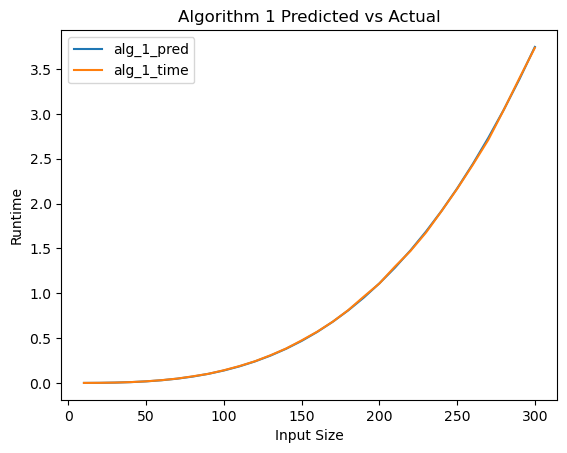

In [15]:
# Build plot for Algorithm 1
alg_1_plot = df.plot(x='dim', y=['alg_1_pred', 'alg_1_time'], kind='line')
alg_1_plot.set_xlabel('Input Size')
alg_1_plot.set_ylabel('Runtime')
alg_1_plot.set_title('Algorithm 1 Predicted Time vs Actual Time')
alg_1_plot

<Axes: title={'center': 'Algorithm 2 Predicted vs Actual'}, xlabel='Input Size', ylabel='Runtime'>

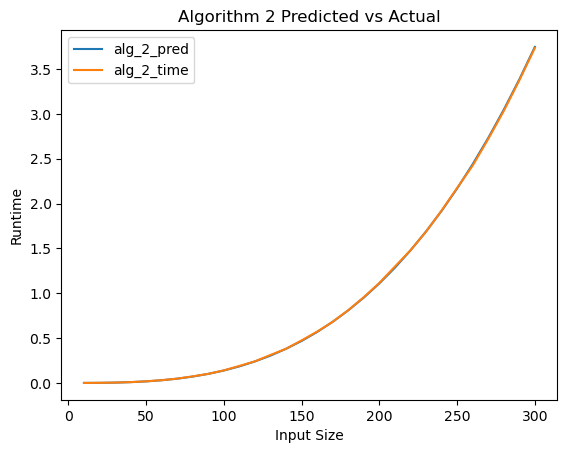

In [16]:
# Build plot for Algorithm 2
alg_2_plot = df.plot(x='dim', y=['alg_2_pred', 'alg_2_time'], kind='line')
alg_2_plot.set_xlabel('Input Size')
alg_2_plot.set_ylabel('Runtime')
alg_2_plot.set_title('Algorithm 2 Predicted Time vs Actual Time')
alg_2_plot

<Axes: title={'center': 'Algorithm 3 Predicted vs Actual'}, xlabel='Input Size', ylabel='Runtime'>

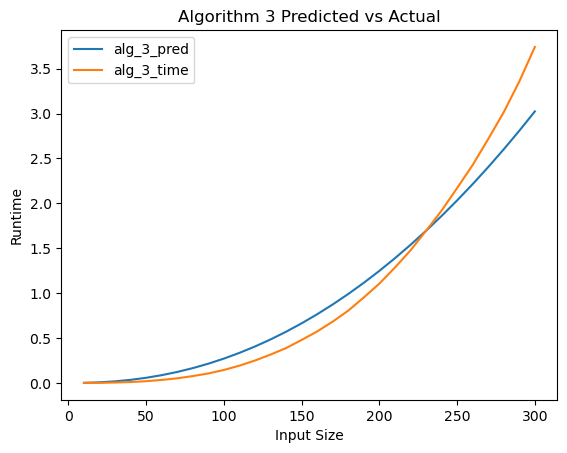

In [17]:
# Build plot for Algorithm 3
alg_3_plot = df.plot(x='dim', y=['alg_3_pred', 'alg_3_time'], kind='line')
alg_3_plot.set_xlabel('Input Size')
alg_3_plot.set_ylabel('Runtime')
alg_3_plot.set_title('Algorithm 3 Predicted Time vs Actual Time')
alg_3_plot

## Experiment 2

### Generate 9 exponentially growing square matrices of size 2^i × 2^i, where 0 ≤ i ≤ 9

In [35]:
exp_matrix_pairs = []
for i in range(0, 10):
    shape = np.power(2, i)
    matrix_1 = np.random.rand(shape, shape)
    matrix_2 = np.random.rand(shape, shape)
    exp_matrix_pairs.append([matrix_1, matrix_2])

In [36]:
# Build the column structure for results dataframe
exp_df = pd.DataFrame({
    'dim': [],
    
    'alg_1_time': [],
    'alg_3_time': [],
    'alg_4_time': [],
    'alg_5_time': [],
    
    'alg_1_pred': [],
    'alg_3_pred': [],
    'alg_4_pred': [],
    'alg_5_pred': []
})

# Show dimension as integer
exp_df['dim'] = df['dim'].astype(int) #why not exp df

# Show calculated complexities as integers
exp_df['alg_1_pred'] = exp_df['alg_1_pred'].astype(int) # why pred and not both or just actual
exp_df['alg_3_pred'] = exp_df['alg_3_pred'].astype(int)
exp_df['alg_4_pred'] = exp_df['alg_4_pred'].astype(int)
exp_df['alg_5_pred'] = exp_df['alg_5_pred'].astype(int)

# Confirm column structure in dataframe
df.head(1)

,dim,alg_1_time,alg_3_time,alg_4_time,alg_5_time,alg_1_pred,alg_3_pred,alg_4_pred,alg_5_pred


In [37]:
new_rows = []
for i, pair in enumerate(exp_matrix_pairs):
    print(f'Timing matrix pair {i + 1} (i={i})...')
    A, B = pair[0], pair[1], 
    p, q, r = A.shape[0], A.shape[1], B.shape[1]
    C = np.zeros((p, r))
    
    # 5 runs to take average
    alg_1_times, alg_3_times, alg_4_times, alg_5_times = [], [], [], []
    for i in range(5):
        # Timing Algorithm 1
        t1 = t.time()
        alg_1_answer = algorithm_1(A, B, C, p, q, r)
        t2 = t.time()
        alg_1_times.append(t2 - t1)
    
        # Timing Algorithm 3
        t1 = t.time()
        alg_3_answer = algorithm_3(A, B, C, p, q, r)
        t2 = t.time()
        alg_3_times.append(t2 - t1)
    
        # Timing Algorithm 4
        t1 = t.time()
        alg_4_answer = algorithm_4(A, B, C)
        t2 = t.time()
        alg_4_times.append(t2 - t1)

        # Timing Algorithm 5
        t1 = t.time()
        alg_5_answer = algorithm_5(A, B, C)
        t2 = t.time()
        alg_5_times.append(t2 - t1)
        
    # Take averages from 5 runs
    alg_1_time = np.mean(alg_1_times)
    alg_3_time = np.mean(alg_3_times)
    alg_4_time = np.mean(alg_4_times)
    alg_5_time = np.mean(alg_5_times)
    
    # Generate a new row for the DataFrame
    new_row = {
    'dim': p,
        
    'alg_1_time': round(alg_1_time, 5),
    'alg_3_time': round(alg_3_time, 5),
    'alg_4_time': round(alg_4_time, 5),
    'alg_5_time': round(alg_5_time, 5),
        
    'alg_1_pred': np.power(p, 3),
    'alg_3_pred': round(np.power(p, 2) * np.log2(p)),
    'alg_4_pred': round(np.power(p, 2.81)),
    'alg_5_pred': np.power(p, 2.81)
    }
    
    new_rows.append(new_row)

# Add data to the DataFrame
exp_df = pd.concat([exp_df, pd.DataFrame(new_rows)], ignore_index=True)
print("Results Ready")

Timing matrix pair 1 (i=0)...
Timing matrix pair 2 (i=1)...
Timing matrix pair 3 (i=2)...
Timing matrix pair 4 (i=3)...
Timing matrix pair 5 (i=4)...
Timing matrix pair 6 (i=5)...
Timing matrix pair 7 (i=6)...
Timing matrix pair 8 (i=7)...
Timing matrix pair 9 (i=8)...
Timing matrix pair 10 (i=9)...
Results Ready


In [38]:
exp_df.style

,dim,alg_1_time,alg_3_time,alg_4_time,alg_5_time,alg_1_pred,alg_3_pred,alg_4_pred,alg_5_pred
0,1,0.000010,0.000010,0.000020,0.000010,1,0,1,1
1,2,0.000010,0.000040,0.000140,0.000020,8,4,7,8
2,4,0.000050,0.000210,0.000620,0.000140,64,32,49,64
3,8,0.000260,0.000710,0.002690,0.000730,512,192,345,512
4,16,0.001600,0.002430,0.013440,0.003190,4096,1024,2419,4096
5,32,0.012300,0.015650,0.092400,0.022340,32768,5120,16962,32768
6,64,0.096610,0.107790,0.647280,0.153880,262144,24576,118950,262144
7,128,0.755090,0.809100,4.499360,1.081970,2097152,114688,834180,2097152
8,256,5.929490,6.362620,31.378900,7.477530,16777216,524288,5849979,16777216
9,512,52.981660,56.399780,240.054420,57.118390,134217728,2359296,41025000,134217728


In [39]:
### Scale Complexities by dividing by the mean
exp_df['alg_1_pred'] = exp_df['alg_1_pred'] / exp_df['alg_1_pred'].mean()
exp_df['alg_1_time'] = exp_df['alg_1_time'] / exp_df['alg_1_time'].mean()

exp_df['alg_3_pred'] = exp_df['alg_3_pred'] / exp_df['alg_3_pred'].mean()
exp_df['alg_3_time'] = exp_df['alg_3_time'] / exp_df['alg_3_time'].mean()

exp_df['alg_4_pred'] = exp_df['alg_4_pred'] / exp_df['alg_4_pred'].mean()
exp_df['alg_4_time'] = exp_df['alg_4_time'] / exp_df['alg_4_time'].mean()

exp_df['alg_5_pred'] = exp_df['alg_5_pred'] / exp_df['alg_5_pred'].mean()
exp_df['alg_5_time'] = exp_df['alg_5_time'] / exp_df['alg_5_time'].mean()

<Axes: title={'center': 'Algorithm 1 Predicted Time vs Actual Time'}, xlabel='Input Size', ylabel='Runtime'>

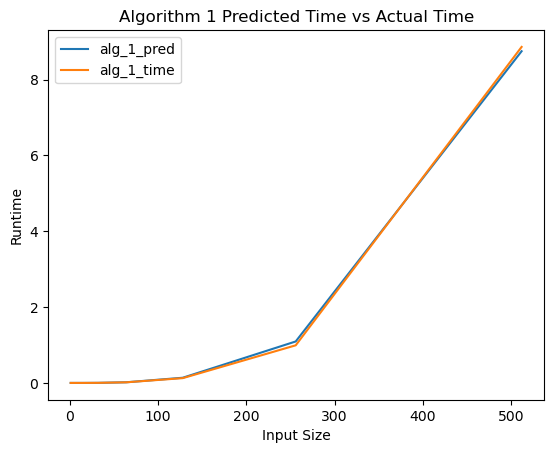

In [40]:
# Build plot for Algorithm 1
alg_1_plot_exp = exp_df.plot(x='dim', y=['alg_1_pred', 'alg_1_time'], kind='line')
alg_1_plot_exp.set_xlabel('Input Size')
alg_1_plot_exp.set_ylabel('Runtime')
alg_1_plot_exp.set_title('Algorithm 1 Predicted Time vs Actual Time')
alg_1_plot_exp

<Axes: title={'center': 'Algorithm 3 Predicted Time vs Actual Time'}, xlabel='Input Size', ylabel='Runtime'>

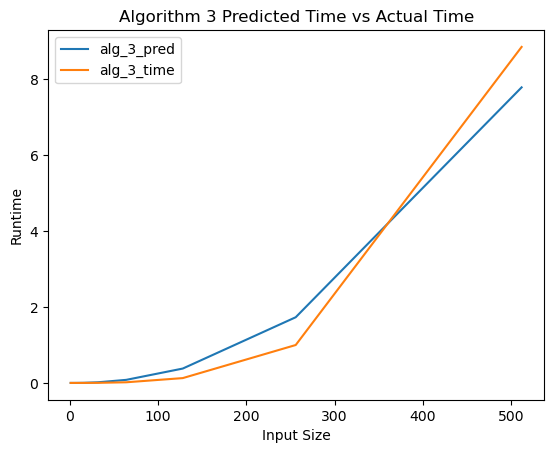

In [42]:
# Build plot for Algorithm 3
alg_3_plot_exp = exp_df.plot(x='dim', y=['alg_3_pred', 'alg_3_time'], kind='line')
alg_3_plot_exp.set_xlabel('Input Size')
alg_3_plot_exp.set_ylabel('Runtime')
alg_3_plot_exp.set_title('Algorithm 3 Predicted Time vs Actual Time')
alg_3_plot_exp

<Axes: title={'center': 'Algorithm 4 Predicted Time vs Actual Time'}, xlabel='Input Size', ylabel='Runtime'>

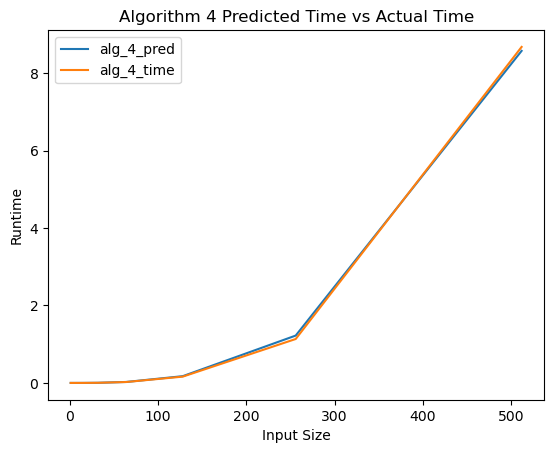

In [41]:
# Build plot for Algorithm 4
alg_4_plot_exp = exp_df.plot(x='dim', y=['alg_4_pred', 'alg_4_time'], kind='line')
alg_4_plot_exp.set_xlabel('Input Size')
alg_4_plot_exp.set_ylabel('Runtime')
alg_4_plot_exp.set_title('Algorithm 4 Predicted Time vs Actual Time')
alg_4_plot_exp

<Axes: title={'center': 'Algorithm 5 Predicted Time vs Actual Time'}, xlabel='Input Size', ylabel='Runtime'>

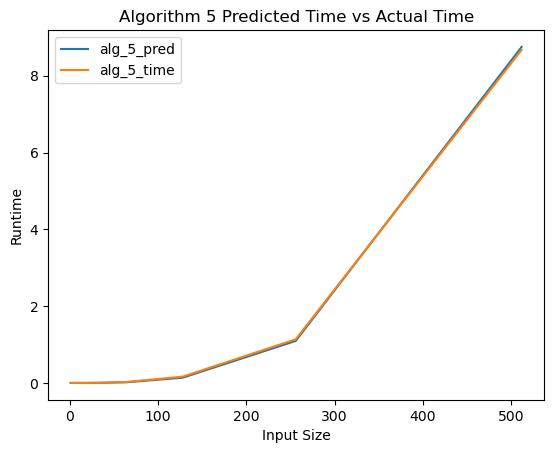

In [44]:
# Build plot for Algorithm 5
alg_5_plot_exp = exp_df.plot(x='dim', y=['alg_5_pred', 'alg_5_time'], kind='line')
alg_5_plot_exp.set_xlabel('Input Size')
alg_5_plot_exp.set_ylabel('Runtime')
alg_5_plot_exp.set_title('Algorithm 5 Predicted Time vs Actual Time')
alg_5_plot_exp

# Matrix Chain Multiplication Problem

### Maxtrix chain order algorithm - takes inputs p as list of matrices and n for the number of matrices and outputs the numpy arrays of the minimum costs as m and split points as s

In [ ]:
def matrix_chain_order(p, n):
    m = np.zeros((n, n))
    s = np.zeros((n, n)).astype(int)
    max = np.inf #infinity

    for l in range(2, n):
        for i in range(0, n - l + 1):
            j = i + l - 1
            m[i, j] = max
            
            for k in range(i, j):
                q = m[i, k] + m[k + 1, j] + p[i-1] * p[k] * p[j]
                
                if q < m[i, j]:
                    m[i, j] = q
                    s[i, j] = k

    return m, s

### Chain matrix multiplication algorithm - taking inputs list of matrices A, an array of split points s, and the start and end indices i,j, recursively multiplies matrices in the optimal order and outputs the product matrix.

In [223]:
def chain_matrix_multiplication_algorithm(A, s, i, j):
    if i == j:
        return A[i]
        
    else:
        a = chain_matrix_multiplication_algorithm(A, s, i, s[i, j])
        b = chain_matrix_multiplication_algorithm(A, s, s[i, j] + 1, j)
        p, q, r = a.shape[0], a.shape[1], b.shape[1]
        c = np.zeros((p, r))
        
    return algorithm_1(a, b, c, p, q, r)

### Sequential matrix multiplication algorithm - inputs a matrix chain and applies matrix mulitplcation to output a product matrix

In [224]:
def sequential_matrix_multiplication(matrix_chain):
    # Get the first matrix in the chain
    product = matrix_chain[0]

    i = 1
    while i <= len(matrix_chain) - 1:
        # Get the next matrix in the chain & values p, q, & r
        next = matrix_chain[i]
        p, q, r = product.shape[0], product.shape[1], next.shape[1]
        # Multiply the running product and the next matrix
        # using Algorithm 1 and store the result for the next iteration
        product = algorithm_1(product, next, np.zeros((p, r)), p, q, r)
        
        i += 1
        
    return product
        

### Generate 19 matrix chains

In [211]:
# Makes 19 matrix chains of length 10 each with dimensions between (10, j * 10) & random values between 0 and 1
matrix_chains = []
P = []  # store dimensions for matrix chain order calculation
for j in range(2, 21):
    A = [] 
    P_j = []
    prev_p = np.random.randint(10, j * 10)
    for i in range(1, 11):
        p = np.random.randint(10, j * 10)
        A.append(np.random.rand(prev_p, p))
        P_j.append(prev_p)
        prev_p = p
        
    matrix_chains.append(A)
    P.append(P_j)

### Build empty Pandas DataFrame

In [212]:
# Build the column structure for results dataframe
chain_df = pd.DataFrame({
    'Matrix Chain ID': [],
    'Matrix Size Upper Bound': [],
    'Sequential Time': [],
    'Optimal Time': []    
})

# Show values as integers 
chain_df['Matrix Chain ID'] = chain_df['Matrix Chain ID'].astype(int)  
chain_df['Matrix Size Upper Bound'] = chain_df['Matrix Size Upper Bound'].astype(int)

# Confirm column structure in dataframe
chain_df.head(1)

,Matrix Chain ID,Matrix Size Upper Bound,Sequential Time,Optimal Time


### Time execution and add data Pandas DataFrame

In [213]:
new_rows = []

for j, matrix_chain in enumerate(matrix_chains):
    print(f'Timing Chain {j + 1}...')
    P_j = P[j]
    
    sequential_times, optimal_times = [], []
    m, s = matrix_chain_order(P_j, len(P_j))
    # 5 runs to take average
    for i in range(2):
        
        # Timing sequential chain matrix multiplication
        t1 = t.time()
        sequential_answer = sequential_matrix_multiplication(matrix_chain) 
        t2 = t.time()
        sequential_times.append(t2 - t1)

        # Timing optimal chain matrix multiplication
        t1 = t.time()
        optimal_answer = chain_matrix_multiplication_algorithm(matrix_chain, s, 0, 9)
        t2 = t.time()
        optimal_times.append(t2 - t1)
        
    # Take averages from 5 runs
    sequential_time = np.mean(sequential_times)
    optimal_time = np.mean(optimal_times)
    
    
    # Generate a new row for the DataFrame
    new_row = {
        'Matrix Chain ID': j,
        'Matrix Size Upper Bound': j * 10,
        'Sequential Time': sequential_time,
        'Optimal Time': optimal_time
    }
    
    new_rows.append(new_row)

# Add data to the DataFrame
chain_df = pd.concat([chain_df, pd.DataFrame(new_rows)], ignore_index=True)
print("Results Ready")

Timing Chain 1...
Timing Chain 2...
Timing Chain 3...
Timing Chain 4...
Timing Chain 5...
Timing Chain 6...
Timing Chain 7...
Timing Chain 8...
Timing Chain 9...
Timing Chain 10...
Timing Chain 11...
Timing Chain 12...
Timing Chain 13...
Timing Chain 14...
Timing Chain 15...
Timing Chain 16...
Timing Chain 17...
Timing Chain 18...
Timing Chain 19...
Results Ready


In [214]:
chain_df['Matrix Chain ID'] = chain_df['Matrix Chain ID'].astype(int)  
chain_df['Matrix Size Upper Bound'] = chain_df['Matrix Size Upper Bound'].astype(int)
chain_df.style

,Matrix Chain ID,Matrix Size Upper Bound,Sequential Time,Optimal Time
0,0,0,0.015419,0.014032
1,1,10,0.033246,0.033865
2,2,20,0.015540,0.022742
3,3,30,0.081017,0.089278
4,4,40,0.055755,0.119280
5,5,50,0.207775,0.239617
6,6,60,0.390838,0.577644
7,7,70,0.168770,0.580753
8,8,80,0.300908,0.756885
9,9,90,0.560156,0.264777


### Plot setup

<Axes: title={'center': 'Comparison of Sequential Versus Optimal Chain Matrix Multiplication Time'}, xlabel='Matrix Size Upper Bound', ylabel='Time'>

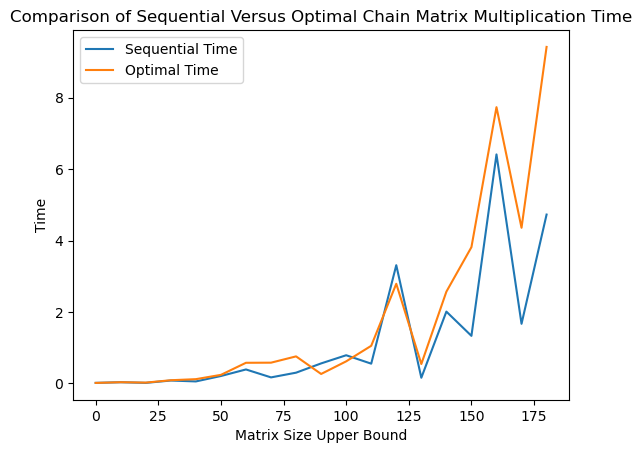

In [215]:
# titles and labels
chain_plot = chain_df.plot(x='Matrix Size Upper Bound', y=['Sequential Time', 'Optimal Time'], kind='line')
chain_plot.set_xlabel('Matrix Size Upper Bound')
chain_plot.set_ylabel('Time')
chain_plot.set_title('Comparison of Sequential Versus Optimal Chain Matrix Multiplication Time')
chain_plot
